# The Business Problem:

The company A that operates in e-commerce field wants to deeply understand customer characteristics and behavior to optimize marketing and sales strategies. Besides, enhace satisfaction and loyalty of customer through personalization strategies.

# Dataset Description:
The company supply the online retail dataset that record all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

### Details of the columns:
This dataset contains 8 variables that correspond to:

- **InvoiceNo**: Invoice number. A unique number for each transaction. If it starts with C which means cancelled operations.

- **StockCode**: Product code. A unique number for each product.

- **Description**: Product name.

- **Quantity**: It refers to how many of the products in the invoices have been sold.

- **InvoiceDate**: Invoice date.

- **UnitPrice**: Product price (pound)

- **CustomerID**: Unique customer number.

- **Country**: The name of the country where the customer lives.

# The Business Objective:
- Understand Customer Needs and Preferences
- Targeted Markeing and Communication
- Product Development and Innovation
- Optimize Pricing Strategies
- Enhance Customer Experience
- Resource Allocation and Efficiency

## Approach:
**Customer segmentation** is the practice of dividing a customer base into groups of individuals that are similar in specific ways relevant to marketing, such as age, gender, interests and spending habits.

Companies employing customer segmentation operate under the fact that every customer is different and that their marketing efforts would be better served if they target specific, smaller groups with messages that those consumers would find relevant and lead them to buy something. Companies also hope to gain a deeper understanding of their customers' preferences and needs with the idea of discovering what each segment finds most valuable to more accurately tailor marketing materials toward that segment.

Customer segmentation relies on identifying key differentiators that divide customers into groups that can be targeted. Information such as a customers' demographics (age, race, religion, gender, family size, ethnicity, income, education level), geography (where they live and work), psychographic (social class, lifestyle and personality characteristics) and behavioral (spending, consumption, usage and desired benefits) tendencies are taken into account when determining customer segmentation practices

# **1. Setting Up the Environment**

In [ ]:
# # Install OpenJDK 8
!apt-get update -qq
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [ ]:
# Download and extract Spark 3.5.0
!wget -q https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
!tar xf spark-3.5.0-bin-hadoop3.tgz

In [ ]:
#
!pip install -q findspark gradio pandas matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.2 MB/s eta 0:00:00


In [ ]:
!ls /content/spark-3.5.0-bin-hadoop3/python/lib/


py4j-0.10.9.7-src.zip  PY4J_LICENSE.txt  pyspark.zip


In [ ]:

# Initializing a SparkSession
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("ECommerceAnalysis3") \
    .config("spark.executor.memory", "24g") \
    .config("spark.driver.memory", "16g") \
    .getOrCreate()

# Check Spark version
print(f"Phiên bản Spark: {spark.version}")

Phiên bản Spark: 3.5.0


# **2. Data Collection and Preprocessing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
local_path ='/content/drive/MyDrive/Colab Notebooks/Customer-Segmentation-QuynhLam-TienLoc-HuuThang/1_Dataset/data.csv'

In [ ]:
# import necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats
from scipy.stats import skew

In [ ]:
# import data
df = pd.read_csv(local_path, encoding='latin1')

In [ ]:
df[df['CustomerID']==12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom


In [ ]:
# Load the dataset into a Spark DataFrame
df = spark.read.csv(local_path, header=True, inferSchema=True)

df.show(5)

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
only showing top 5 rows



# **3. Exploratory Data Analysis (EDA) & Cleaning Data**

## 3.1. General informations about data - Statistical Summary

In [ ]:
# Display the structure of the DataFrame
print("DataFrame Schema:")
df.printSchema()

DataFrame Schema:
root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)



Classify the features of data:
- Categorical features:  `InvoiceNo`, `StockCode`, `Description`, `CustomerID`, `Country`
- Numerical features: `Quantity`, `UnitPrice`
- Temporal feature: `InvoiceDate`

In [ ]:
# Data Shape
num_rows = df.count()
num_columns = len(df.columns)
data_shape = (num_rows, num_columns)
print(data_shape)

(541909, 8)


- The data contains 8 columns with 541909 records about purchase activities of customers.

In [ ]:
# Percentage of missing values ​​out of total records
from pyspark.sql.functions import col, sum, count

missing_values = df.select([
    (sum(col(c).isNull().cast("int")) / num_rows * 100).alias(c)
    for c in df.columns
])
missing_values.show(5)

+---------+---------+------------------+--------+-----------+---------+------------------+-------+
|InvoiceNo|StockCode|       Description|Quantity|InvoiceDate|UnitPrice|        CustomerID|Country|
+---------+---------+------------------+--------+-----------+---------+------------------+-------+
|      0.0|      0.0|0.2683107311375157|     0.0|        0.0|      0.0|24.926694334288598|    0.0|
+---------+---------+------------------+--------+-----------+---------+------------------+-------+



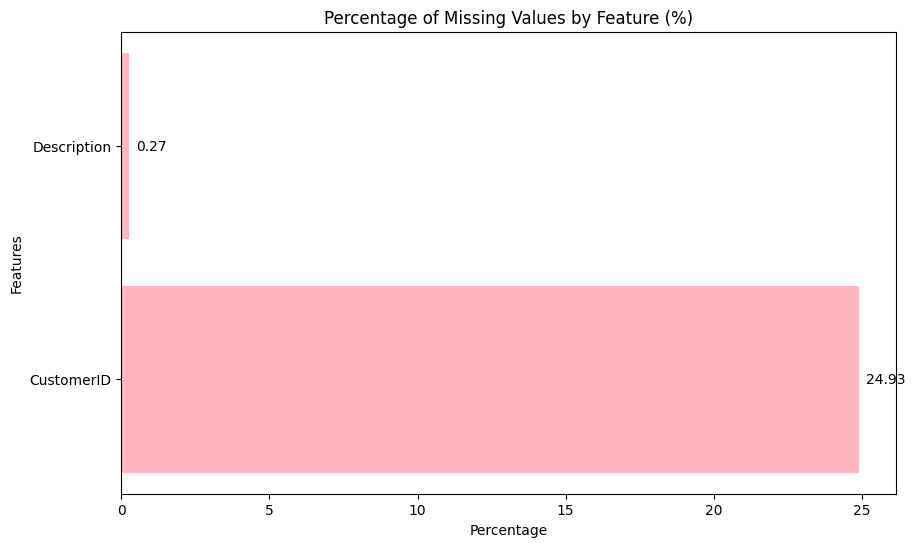

In [ ]:
# Convert Spark DataFrame to Pandas DataFrame
missing_values = missing_values.toPandas().T
missing_values.columns = ["Missing Percentage"]

# Filter columns with missing > 0 and sort in descending order
missing_values = missing_values[missing_values["Missing Percentage"] > 0]
missing_values = missing_values.sort_values(by="Missing Percentage", ascending=False)

# Draw a chart
plt.figure(figsize=(10, 6))
chart = plt.barh(missing_values.index, missing_values["Missing Percentage"], color='lightpink')
plt.bar_label(chart, missing_values["Missing Percentage"].round(2), label_type='edge', padding=5)
plt.title('Percentage of Missing Values by Feature (%)')
plt.xlabel('Percentage')
plt.ylabel('Features')
plt.show()

- Approximately 24.93% missing values of all Customer data. This is a large number of missing values, we should consider replacing the missing values by other representative values or delete them if they are not effect to the process of classification.
- Besides, we have 0.27% missing values of Description. We could fill them based on `StockCode`.

### Cleaning Data 1: Handle Missing Value

**CustomerID**

In [ ]:
# Filter rows where CustomerID is NULL
df1 = df.filter(col("CustomerID").isNull())
df1.show()

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|   536414|    22139|                NULL|      56|12/1/2010 11:52|      0.0|      NULL|United Kingdom|
|   536544|    21773|DECORATIVE ROSE B...|       1|12/1/2010 14:32|     2.51|      NULL|United Kingdom|
|   536544|    21774|DECORATIVE CATS B...|       2|12/1/2010 14:32|     2.51|      NULL|United Kingdom|
|   536544|    21786|  POLKADOT RAIN HAT |       4|12/1/2010 14:32|     0.85|      NULL|United Kingdom|
|   536544|    21787|RAIN PONCHO RETRO...|       2|12/1/2010 14:32|     1.66|      NULL|United Kingdom|
|   536544|    21790|  VINTAGE SNAP CARDS|       9|12/1/2010 14:32|     1.66|      NULL|United Kingdom|
|   536544|    21791|VINTAGE HEADS AND...|       2|12/1/2010 14:

In [ ]:
# Get the list of unique values ​​in column 'InvoiceNo' that are missing CustomerID data
invoices_have_missing_customer = df1.select("InvoiceNo").distinct().rdd.flatMap(lambda x: x).collect()
print(invoices_have_missing_customer)


['536596', '537252', '538041', '547557', '548998', '549160', '551692', '552215', '552677', '562463', '562945', '536765', '537439', '537870', '538142', '538177', '542512', '542515', '543521', '543536', '546016', '546892', '549510', 'C553370', '556319', '536414', '537874', '539242', '541128', '543310', '543782', '547398', '551848', '557644', '562383', '537666', '538001', '538092', '541601', '542551', '543049', '546010', '546379', '546661', '548165', '549008', '549032', '549327', '551176', '551444', '551704', '554634', '556310', '556810', '557847', '559373', '559503', '560117', '536550', '537878', '541494', '541882', '543796', '544767', '549426', '555502', '558066', 'C537600', '540241', '548209', '548901', '548980', '550641', '550908', '552667', '554653', '556317', '557028', '557151', '558064', '560358', '538627', '538724', '539708', '539718', '539980', '549846', '551168', '557415', '559304', '559378', '560373', '561086', '538148', '539081', '541000', 'C541650', '542391', '542861', '54700

In [ ]:
# Filter rows with InvoiceNo in the invoices_have_missing_customer list
df2 = df.filter(col("InvoiceNo").isin(invoices_have_missing_customer))
df2.show()


+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|   536414|    22139|                NULL|      56|12/1/2010 11:52|      0.0|      NULL|United Kingdom|
|   536544|    21773|DECORATIVE ROSE B...|       1|12/1/2010 14:32|     2.51|      NULL|United Kingdom|
|   536544|    21774|DECORATIVE CATS B...|       2|12/1/2010 14:32|     2.51|      NULL|United Kingdom|
|   536544|    21786|  POLKADOT RAIN HAT |       4|12/1/2010 14:32|     0.85|      NULL|United Kingdom|
|   536544|    21787|RAIN PONCHO RETRO...|       2|12/1/2010 14:32|     1.66|      NULL|United Kingdom|
|   536544|    21790|  VINTAGE SNAP CARDS|       9|12/1/2010 14:32|     1.66|      NULL|United Kingdom|
|   536544|    21791|VINTAGE HEADS AND...|       2|12/1/2010 14:

- We try to fill into the missing values in the `CustomerID` column based on `InvoiceNo` information. However, It seems all invoices that have corresponding missing values in the `CustomerID` column because the customers of those invoices didn't leave any information. To not effect to the analysis, we should drop the records that have missing values.

In [ ]:
# Remove rows with NULL values ​​in the CustomerID column
df = df.na.drop(subset=["CustomerID"])

# Display schema (DataFrame structure)
df.printSchema()

# Displays the number of records and columns
print(f"Number of rows: {df.count()}, Number of columns: {len(df.columns)}")


root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)

Number of rows: 406829, Number of columns: 8


- We can observe that the the data no longer have any missing values, including the missing values in the `Desscription` column. It means the missing values of description correspond to the invoice having no information about customer id.

### Cleaning Data 2: Handle Duplicated Values

In [ ]:
# Count the number of duplicate records
duplicate_count = df.groupBy(df.columns).count().filter(col("count") > 1).selectExpr("sum(count - 1) as total_duplicates")
duplicate_count.show()

+----------------+
|total_duplicates|
+----------------+
|            5225|
+----------------+



In [ ]:
# Remove duplicate records
df = df.dropDuplicates()

# Check the number of duplicate records again
duplicate_count = df.groupBy(df.columns).count().filter(col("count") > 1).selectExpr("sum(count - 1) as total_duplicates")
duplicate_count.show()

+----------------+
|total_duplicates|
+----------------+
|            NULL|
+----------------+



### Cleaning Data 3: Datatype Issues

**Categorical Features**

In [ ]:
from pyspark.sql.types import StringType

categorical_features = ['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country']

for col_name in categorical_features:
    df = df.withColumn(col_name, df[col_name].cast(StringType()))


In [ ]:
# Check the schema again
df.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Country: string (nullable = true)



**Temporal Feature**

In [ ]:
# Convert the data type of InvoiceDate to timestamp
from pyspark.sql.functions import to_timestamp

df = df.withColumn("InvoiceDate", to_timestamp(df["InvoiceDate"], "M/d/yyyy H:mm"))


In [ ]:
df.show(5)

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536367|    22745|POPPY'S PLAYHOUSE...|       6|2010-12-01 08:34:00|      2.1|     13047|United Kingdom|
|   536368|    22960|JAM MAKING SET WI...|       6|2010-12-01 08:34:00|     4.25|     13047|United Kingdom|
|   536388|    22915|ASSORTED BOTTLE T...|      12|2010-12-01 09:59:00|     0.42|     16250|United Kingdom|
|   536401|    21464|DISCO BALL ROTATO...|       1|2010-12-01 11:21:00|     4.25|     15862|United Kingdom|
|   536412|    22569|FELTCRAFT CUSHION...|       2|2010-12-01 11:49:00|     3.75|     17920|United Kingdom|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
only showing top 5 rows



In [ ]:
# Display the structure of the DataFrame
df.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: timestamp (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Country: string (nullable = true)



## 3.2. Distribution of Numerical variables

In [ ]:
# Descriptive statistics for columns 'Quantity' and 'UnitPrice'
df.select("Quantity", "UnitPrice").describe().show()


+-------+------------------+------------------+
|summary|          Quantity|         UnitPrice|
+-------+------------------+------------------+
|  count|            401604|            401604|
|   mean|12.183272576966365|3.4740636398037554|
| stddev|250.28303714445252| 69.76403506411025|
|    min|            -80995|               0.0|
|    max|             80995|           38970.0|
+-------+------------------+------------------+



**UnitPrice Feature**

- As we can see, the smallest value of UnitPrice is 0. It could be price of bonus item or mistake of data entry process. First step, we will handle the UnitPrice values that are zero

In [ ]:
# Filters lines with UnitPrice = 0 and displays the first 5 lines
df.filter(df["UnitPrice"] == 0).show(5)


+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   561916|        M|              Manual|       1|2011-08-01 11:44:00|      0.0|     15581|United Kingdom|
|   561284|    22167| OVAL WALL MIRROR...|       1|2011-07-26 12:24:00|      0.0|     16818|United Kingdom|
|   548318|    22055|MINI CAKE STAND  ...|       5|2011-03-30 12:45:00|      0.0|     13113|United Kingdom|
|   554037|    22619|SET OF 6 SOLDIER ...|      80|2011-05-20 14:13:00|      0.0|     12415|     Australia|
|   539722|    22423|REGENCY CAKESTAND...|      10|2010-12-21 13:45:00|      0.0|     14911|          EIRE|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
only showing top 5 rows



In [ ]:
# Check unit price of stock that has code 22841
df.filter(col("StockCode") == "22841").show()

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   544659|    22841|ROUND CAKE TIN VI...|       1|2011-02-22 13:20:00|     7.95|     18114|United Kingdom|
|   562046|    22841|ROUND CAKE TIN VI...|       2|2011-08-02 10:34:00|     7.95|     12378|   Switzerland|
|   555388|    22841|ROUND CAKE TIN VI...|       2|2011-06-02 15:48:00|     7.95|     17719|United Kingdom|
|   542360|    22841|ROUND CAKE TIN VI...|       1|2011-01-27 12:40:00|     7.95|     14701|United Kingdom|
|   543555|    22841|ROUND CAKE TIN VI...|       4|2011-02-10 10:18:00|     7.95|     17686|United Kingdom|
|   552839|    22841|ROUND CAKE TIN VI...|       1|2011-05-11 14:25:00|     7.95|     14367|United Kingdom|
|   547885|    22841|ROUND C

In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number, count, col

# Group by StockCode and count the number of occurrences of each UnitPrice
df_mode = df.groupBy("StockCode", "UnitPrice").agg(count("*").alias("count"))

# Sort by StockCode and decreasing number of occurrences to get mode
windowSpec = Window.partitionBy("StockCode").orderBy(col("count").desc())

df_mode_ranked = df_mode.withColumn("rank", row_number().over(windowSpec))

# Take only the most common value (rank = 1)
stock_prices = df_mode_ranked.filter(col("rank") == 1).select("StockCode", "UnitPrice")
stock_prices.show()

+---------+---------+
|StockCode|UnitPrice|
+---------+---------+
|    10002|     0.85|
|    10080|     0.39|
|    10120|     0.21|
|   10123C|     0.65|
|   10124A|     0.42|
|   10124G|     0.42|
|    10125|     0.85|
|    10133|     0.42|
|    10135|     1.25|
|    11001|     1.69|
|    15030|     0.29|
|    15034|     0.14|
|    15036|     0.83|
|    15039|     0.85|
|   15044A|     2.95|
|   15044B|     2.95|
|   15044C|     2.95|
|   15044D|     2.95|
|  15056BL|     5.95|
|   15056N|     5.95|
+---------+---------+
only showing top 20 rows



### Cleaning Data 3: Replace Zero values in UnitPrice column

In [ ]:
# Replace zero with price of stock that is defined

from pyspark.sql.functions import when

stock_prices = stock_prices.withColumnRenamed("UnitPrice", "MostFrequentPrice")
df_updated = df.join(stock_prices, on="StockCode", how="left")
df = df_updated.withColumn(
    "UnitPrice",
    when(col("UnitPrice") == 0, col("MostFrequentPrice")).otherwise(col("UnitPrice"))
).drop("MostFrequentPrice")


In [ ]:
# Checking for zero values in UnitPrice column again to confirm
df.filter(col("UnitPrice") == 0).count()


0

In [ ]:
df.select("UnitPrice").describe().show()


+-------+-----------------+
|summary|        UnitPrice|
+-------+-----------------+
|  count|           401604|
|   mean|3.474393643986496|
| stddev|69.76403360155564|
|    min|            0.001|
|    max|          38970.0|
+-------+-----------------+



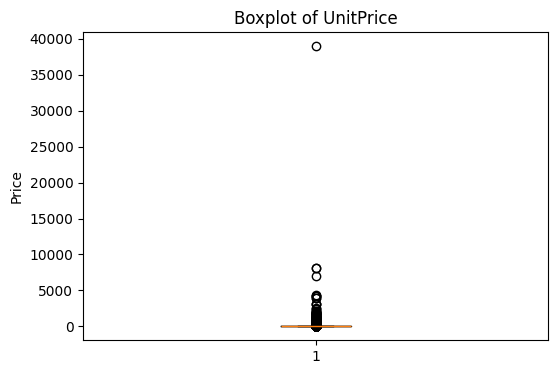

In [ ]:
import matplotlib.pyplot as plt

# Chuyển cột UnitPrice sang Pandas
unit_price_pd = df.select("UnitPrice").toPandas()

# Vẽ boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(unit_price_pd["UnitPrice"], vert=True)
plt.title("Boxplot of UnitPrice")
plt.ylabel("Price")
plt.show()


**Quantity Feature**
- The smallest value of a quantity is a negative number. We should find the mean of negative values and consider whether we can delete them from the dataset or not.

In [ ]:
df_check = df.filter(col("Quantity") < 0)
df_check.show()


+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|StockCode|InvoiceNo|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|    22629|  C543347| SPACEBOY LUNCH BOX |      -1|2011-02-07 12:44:00|     1.95|     12472|       Germany|
|    82583|  C548015|HOT BATHS METAL SIGN|     -30|2011-03-29 11:30:00|     1.69|     13802|United Kingdom|
|    22791|  C539726|T-LIGHT GLASS FLU...|     -10|2010-12-21 14:24:00|     1.25|     17007|United Kingdom|
|    22084|  C540307|PAPER CHAIN KIT E...|     -36|2011-01-06 12:58:00|     2.95|     15823|United Kingdom|
|    22059|  C544830|CERAMIC STRAWBERR...|      -6|2011-02-24 09:59:00|     1.49|     13118|United Kingdom|
|     POST|  C543175|             POSTAGE|      -1|2011-02-04 09:46:00|     18.0|     12712|       Germany|
|    21527|  C545456|RED RET

- All Invoices that correspond with negative quantity have a 'C' letter at the begginning of InvoiceNo. It could be the invoices being canceled.

In [ ]:
from pyspark.sql.functions import sum as spark_sum


# All unique transactions and the number of products purchased in every transaction
transaction_and_products = df.groupBy("InvoiceNo").agg(count("StockCode").alias("Number_of_products"))

# All unique canceled transactions and the number of products purchased in them
transaction_and_products = transaction_and_products.withColumn(
    "Cancelled", when(col("InvoiceNo").startswith("C"), 1).otherwise(0)
)
# Percentage of cancelled orders over total orders
cancelled_percentage = (
    transaction_and_products.agg(spark_sum("Cancelled").alias("TotalCancelled")).collect()[0]["TotalCancelled"]
    * 100
    / transaction_and_products.count()
)

print(f"Percentage of cancelled orders: {cancelled_percentage:.2f}%")


Percentage of cancelled orders: 16.47%


- Approximately 16.47% of the transactions were cancelled. So, obviously it is a big amount from the dataset. I will try to find out whether I can do something with this cancelled data instead of just removing them.

In [ ]:
# Check purchase activity of a particular customer who has cancelled transaction.
df.filter(col("CustomerID") == 17548).show()

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|StockCode|InvoiceNo|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|    21484|  C536391|CHICK GREY HOT WA...|     -12|2010-12-01 10:24:00|     3.45|     17548|United Kingdom|
|    22081|   550755|RIBBON REEL FLORA...|      10|2011-04-20 12:01:00|     1.65|     17548|United Kingdom|
|    22585|   550755|PACK OF 6 BIRDY G...|      24|2011-04-20 12:01:00|     1.25|     17548|United Kingdom|
|    22082|   550755|RIBBON REEL STRIP...|      10|2011-04-20 12:01:00|     1.65|     17548|United Kingdom|
|    22082|  C552049|RIBBON REEL STRIP...|     -10|2011-05-06 10:00:00|     1.65|     17548|United Kingdom|
|    22081|  C552049|RIBBON REEL FLORA...|     -10|2011-05-06 10:00:00|     1.65|     17548|United Kingdom|
|    22585|  C552049|PACK OF

- We can observe that when an order is canceled, there are additional transactions from the same customer that are nearly identical exception of `InvoiceDate` variable and the same `Quantity` (but positive). We give 2 assumptions:

    + **Assumption 1:** each cancel order exists without counterpart
    + **Assumption 2:** each cancel order has one counterpart with the exact same quantity in the dataframe

 - We will make the test to verify that this is accurate for each entry.

In [ ]:
from pyspark.sql.functions import col

# Bước 1: Lọc các giao dịch bị hủy (Quantity < 0)
df_check = df.filter(col("Quantity") < 0)

# Bước 2: Tạo DataFrame chứa giao dịch đối ứng (Quantity > 0)
df_counterpart = df.withColumnRenamed("InvoiceNo", "InvoiceNo_match") \
                   .withColumnRenamed("Quantity", "Quantity_match") \
                   .withColumnRenamed("Description", "Description_match") \
                   .withColumnRenamed("CustomerID", "CustomerID_match")

# Bước 3: Join df_check với df_counterpart để tìm giao dịch đối ứng
df_result = df_check.join(df_counterpart,
                          (df_check["CustomerID"] == df_counterpart["CustomerID_match"]) &
                          (df_check["Description"] == df_counterpart["Description_match"]) &
                          (df_check["Quantity"] == -df_counterpart["Quantity_match"]),
                          "leftanti")  # Lấy các giao dịch không có đối ứng

# Bước 4: Kiểm tra và hiển thị dòng đầu tiên nếu có giao dịch không có đối ứng
if df_result.count() > 0:
    df_result.limit(1).show()  # Chỉ hiển thị dòng đầu tiên
else:
    print("✅ Tất cả giao dịch bị hủy đều có counterpart.")



+---------+---------+--------------------+--------+-------------------+---------+----------+-------+
|StockCode|InvoiceNo|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+-------+
|    22797|  C580165|CHEST OF DRAWERS ...|      -2|2011-12-02 11:21:00|    16.95|     12359| Cyprus|
+---------+---------+--------------------+--------+-------------------+---------+----------+-------+



In [ ]:
df_check_again = df.filter((col("Quantity") < 0) & (col("Description") != "Discount"))


In [ ]:
from pyspark.sql.functions import col


# Bước 2: Chuẩn bị DataFrame chứa giao dịch đối ứng (Quantity > 0)
df_counterpart = df.withColumnRenamed("InvoiceNo", "InvoiceNo_match") \
                   .withColumnRenamed("Quantity", "Quantity_match") \
                   .withColumnRenamed("Description", "Description_match") \
                   .withColumnRenamed("CustomerID", "CustomerID_match") \
                   .withColumnRenamed("InvoiceDate", "InvoiceDate_match")

# Bước 3: Join để tìm giao dịch có đối ứng
df_with_counterpart = df_check_again.join(
    df_counterpart,
    (df_check_again["CustomerID"] == df_counterpart["CustomerID_match"]) &
    (df_check_again["Description"] == df_counterpart["Description_match"]) &
    (df_check_again["Quantity"] >= -df_counterpart["Quantity_match"]) &
    (df_check_again["InvoiceDate"] > df_counterpart["InvoiceDate_match"]),
    "inner"  # Giữ lại các giao dịch có đối ứng
)

# Bước 4: Tìm giao dịch bị hủy mà không có đối ứng
df_without_counterpart = df_check_again.join(
    df_counterpart,
    (df_check_again["CustomerID"] == df_counterpart["CustomerID_match"]) &
    (df_check_again["Description"] == df_counterpart["Description_match"]) &
    (df_check_again["Quantity"] >= -df_counterpart["Quantity_match"]) &
    (df_check_again["InvoiceDate"] > df_counterpart["InvoiceDate_match"]),
    "leftanti"  # Chỉ giữ giao dịch không có đối ứng
)

# Bước 5: Hiển thị kết quả
print(f"The number of canceled transactions that have counterpart: {df_with_counterpart.count()}")
print(f"The number of canceled transactions that don't have counterpart: {df_without_counterpart.count()}")

# Hiển thị 1 dòng đầu tiên nếu có giao dịch không có đối ứng
if df_without_counterpart.count() > 0:
    df_without_counterpart.show(1)


The number of canceled transactions that have counterpart: 14202
The number of canceled transactions that don't have counterpart: 1384
+---------+---------+-----------+--------+-------------------+---------+----------+-------+
|StockCode|InvoiceNo|Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|Country|
+---------+---------+-----------+--------+-------------------+---------+----------+-------+
|        M|  C544577|     Manual|      -1|2011-02-21 14:02:00|   320.69|     12365| Cyprus|
+---------+---------+-----------+--------+-------------------+---------+----------+-------+
only showing top 1 row



- There are 1384 canceled transactions that don't have any purchase command beforehand. We decide to remove them because negative values of quantity belong to purchase command before the point of entry of the database. Removing them helps analysis activities of customers become more exactly.

### Cleaning Data 4: Remove cancelled orders without counterpart

In [ ]:
df = df.subtract(df_without_counterpart)

In [ ]:
num_rows = df.count()  # Đếm số hàng
num_cols = len(df.columns)  # Đếm số cột

print(f"DataFrame has {num_rows} rows and {num_cols} columns.")


DataFrame has 400219 rows and 8 columns.


In [ ]:
df.describe("Quantity").show()


+-------+------------------+
|summary|          Quantity|
+-------+------------------+
|  count|            400219|
|   mean|12.286285758547196|
| stddev| 250.2484029412804|
|    min|            -80995|
|    max|             80995|
+-------+------------------+



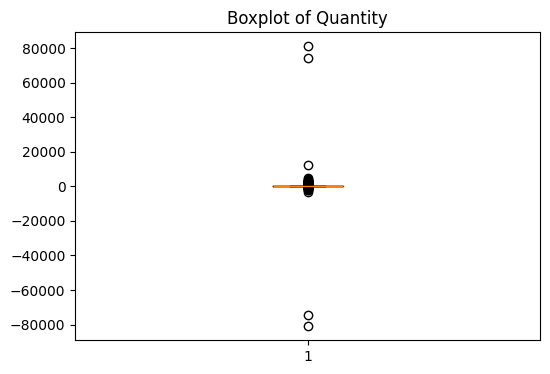

In [ ]:
quantity_pd = df.select("Quantity").toPandas()
plt.figure(figsize=(6, 4))
plt.boxplot(quantity_pd["Quantity"], vert=True)
plt.title("Boxplot of Quantity")
plt.show()

### Cleaning Data 5: Handle Outliers (Method:IQR)

- Outliers may greatly effect the analysis and modeling results. However, the handling of outliers also needs to be carefully comsidered so as so not to eliminate customers who purchase in large volumns, which could be potiental customers.
- The best way to handle outliers in this case is replacing them with bounds

## 3.3. Categorical Variables

3.3.1. Customer Analysis

+-------------+-------------+
|PurchaseCount|CustomerCount|
+-------------+-------------+
|            1|           67|
|            2|           56|
|            3|           49|
|            4|           49|
|            5|           63|
|            6|           74|
|            7|           71|
|            8|           69|
|            9|           65|
|           10|           78|
|           11|           68|
|           12|           71|
|           13|           57|
|           14|           65|
|           15|           64|
|           16|           64|
|           17|           57|
|           18|           56|
|           19|           61|
|           20|           50|
+-------------+-------------+
only showing top 20 rows



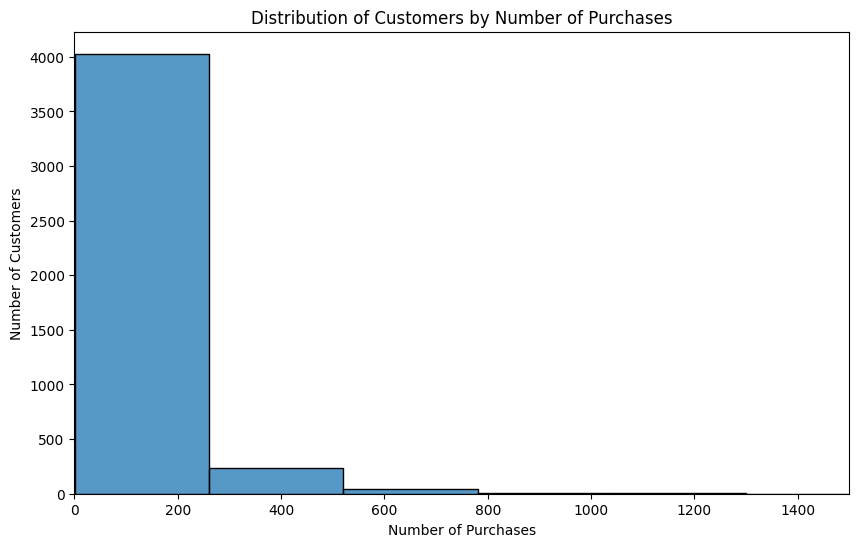

In [ ]:
# Calculate the number of purchases per customer
customer_purchase_counts = df.groupBy("CustomerID").agg(count("*").alias("PurchaseCount"))

# Display the distribution
customer_purchase_counts.groupBy("PurchaseCount").agg(count("*").alias("CustomerCount")).orderBy("PurchaseCount").show()

# For visualization (you'll need to convert to Pandas first):
customer_purchase_counts_pd = customer_purchase_counts.toPandas()

plt.figure(figsize=(10, 6))
sns.histplot(customer_purchase_counts_pd["PurchaseCount"], bins=30)  # Adjust bins as needed
plt.title("Distribution of Customers by Number of Purchases")
plt.xlim(0, 1500)
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.show()


Phân bố lệch phải (Right-skewed Distribution)

- Đa số khách hàng có số lượng mua hàng rất thấp (dưới 200 đơn).

- Một số ít khách hàng có số lượng giao dịch cao bất thường (> 600-1000 đơn), tạo ra các điểm cực trị (outliers).

### 3.3.2. Invoice Analysis

In [ ]:
# Thông kê số đơn hàng theo tháng

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, sum as spark_sum, when, month, round

# Khởi tạo SparkSession
spark = SparkSession.builder.appName("InvoiceAnalysis").getOrCreate()

# Dữ liệu đã được import trước đó
df = df.withColumn("InvoiceDate", df["InvoiceDate"].cast("timestamp"))

# Thêm cột tháng để nhóm dữ liệu
df = df.withColumn("Month", month(col("InvoiceDate")))

# Tính tổng số hóa đơn theo tháng
df_orders_by_month = (
    df.groupBy("Month")
    .agg(
        count("InvoiceNo").alias("Total_Invoices"),
        count(when(col("InvoiceNo").startswith("C"), True)).alias("Cancelled_Invoices")
    )
)

# Tính tỷ lệ hủy đơn hàng và làm tròn đến 2 chữ số thập phân
df_orders_by_month = df_orders_by_month.withColumn(
    "Cancellation_Rate", round((col("Cancelled_Invoices") / col("Total_Invoices")) * 100, 2)
)

# Hiển thị kết quả
df_orders_by_month.orderBy("Month").show()


+-----+--------------+------------------+-----------------+
|Month|Total_Invoices|Cancelled_Invoices|Cancellation_Rate|
+-----+--------------+------------------+-----------------+
|    1|         21479|               488|             2.27|
|    2|         20029|               322|             1.61|
|    3|         27417|               545|             1.99|
|    4|         22940|               505|              2.2|
|    5|         28617|               542|             1.89|
|    6|         27525|               599|             2.18|
|    7|         27167|               585|             2.15|
|    8|         27401|               605|             2.21|
|    9|         40359|               688|              1.7|
|   10|         49813|              1017|             2.04|
|   11|         64157|               976|             1.52|
|   12|         43315|               616|             1.42|
+-----+--------------+------------------+-----------------+



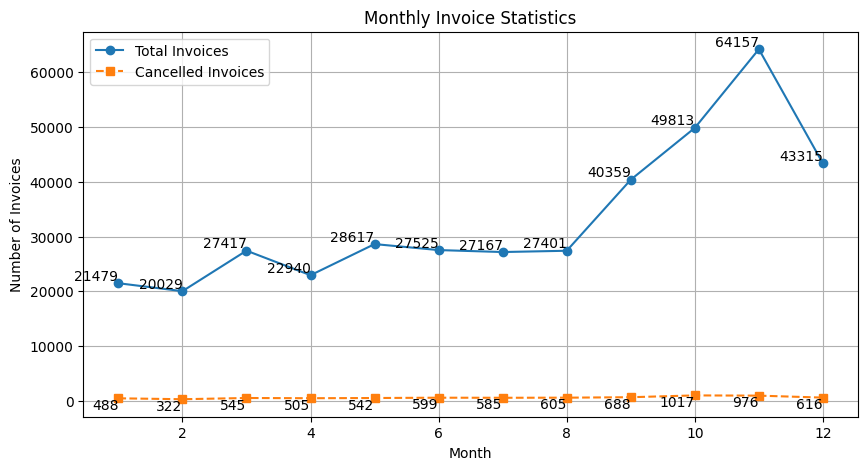

In [ ]:
# Draw a chart of the number of orders grouped by month
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when, month, round
import matplotlib.pyplot as plt
import pandas as pd

# Khởi tạo SparkSession
spark = SparkSession.builder.appName("InvoiceAnalysis").getOrCreate()

# Dữ liệu đã được import trước đó
df = df.withColumn("InvoiceDate", df["InvoiceDate"].cast("timestamp"))

# Thêm cột tháng để nhóm dữ liệu
df = df.withColumn("Month", month(col("InvoiceDate")))

# Tính tổng số hóa đơn theo tháng
df_orders_by_month = (
    df.groupBy("Month")
    .agg(
        count("InvoiceNo").alias("Total_Invoices"),
        count(when(col("InvoiceNo").startswith("C"), True)).alias("Cancelled_Invoices")
    )
)

# Tính tỷ lệ hủy đơn hàng và làm tròn đến 2 chữ số thập phân
df_orders_by_month = df_orders_by_month.withColumn(
    "Cancellation_Rate", round((col("Cancelled_Invoices") / col("Total_Invoices")) * 100, 2)
)

# Chuyển đổi dữ liệu PySpark DataFrame thành Pandas DataFrame để vẽ biểu đồ
df_pd = df_orders_by_month.toPandas().sort_values(by="Month")

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
plt.plot(df_pd["Month"], df_pd["Total_Invoices"], marker="o", linestyle="-", label="Total Invoices")
plt.plot(df_pd["Month"], df_pd["Cancelled_Invoices"], marker="s", linestyle="--", label="Cancelled Invoices")

# Hiển thị số tại mỗi điểm
for i, txt in enumerate(df_pd["Total_Invoices"]):
    plt.text(df_pd["Month"].iloc[i], df_pd["Total_Invoices"].iloc[i], str(txt), ha='right', va='bottom')
for i, txt in enumerate(df_pd["Cancelled_Invoices"]):
    plt.text(df_pd["Month"].iloc[i], df_pd["Cancelled_Invoices"].iloc[i], str(txt), ha='right', va='top')

plt.xlabel("Month")
plt.ylabel("Number of Invoices")
plt.title("Monthly Invoice Statistics")
plt.legend()
plt.grid(True)
plt.show()


3.3.3. Country Analysis

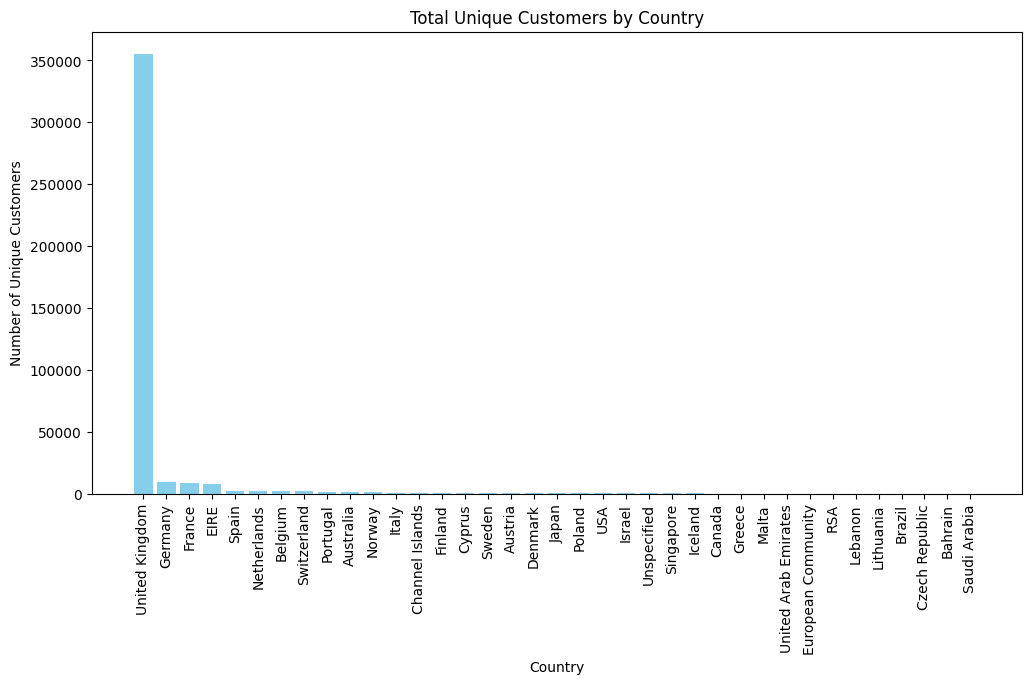

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count
import matplotlib.pyplot as plt
import pandas as pd

# Khởi tạo SparkSession
spark = SparkSession.builder.appName("InvoiceAnalysis").getOrCreate()

# Tính số lượng khách hàng duy nhất theo quốc gia
df_customers_by_country = (
    df.groupBy("Country")
    .agg(count("CustomerID").alias("Total_Unique_Customers"))
)

# Chuyển đổi dữ liệu để vẽ biểu đồ
df_customers_pd = df_customers_by_country.toPandas().sort_values(by="Total_Unique_Customers", ascending=False)

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
plt.bar(df_customers_pd["Country"], df_customers_pd["Total_Unique_Customers"], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Number of Unique Customers")
plt.title("Total Unique Customers by Country")
plt.show()


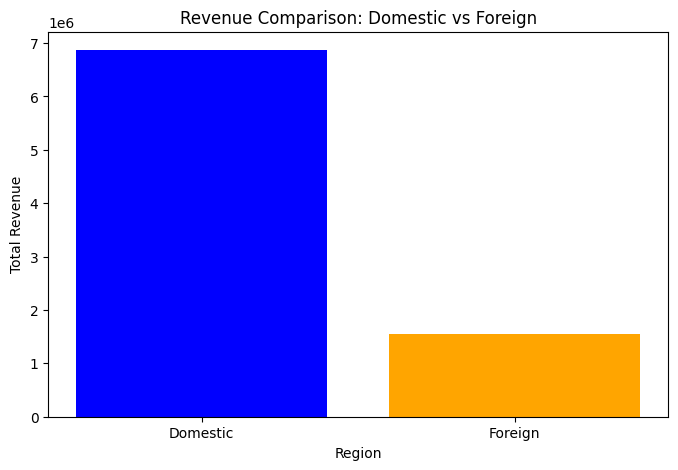

In [ ]:
# Divide customers into two groups: United Kingdom (Domestic) and other countries (Foreign)
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, sum, when
import matplotlib.pyplot as plt
import pandas as pd

# Khởi tạo SparkSession
spark = SparkSession.builder.appName("InvoiceAnalysis").getOrCreate()

# Phân chia khách hàng thành hai nhóm: UK (Inbound) và các nước khác (Outbound)
df_revenue_by_region = (
    df.withColumn("Region", when(col("Country") == "United Kingdom", "Domestic").otherwise("Foreign"))
    .groupBy("Region")
    .agg(sum(col("UnitPrice") * col("Quantity")).alias("Total_Revenue"))
)

# Chuyển đổi dữ liệu để vẽ biểu đồ
df_revenue_pd = df_revenue_by_region.toPandas().sort_values(by="Total_Revenue", ascending=False)

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
plt.bar(df_revenue_pd["Region"], df_revenue_pd["Total_Revenue"], color=['blue', 'orange'])
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.title("Revenue Comparison: Domestic vs Foreign")
plt.show()

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, sum, when
import plotly.express as px
import pandas as pd

# Khởi tạo SparkSession
spark = SparkSession.builder.appName("InvoiceAnalysis").getOrCreate()

# Phân chia khách hàng thành hai nhóm: UK và các nước khác
df_revenue_by_region = (
    df.withColumn("Region", when(col("Country") == "United Kingdom", "Domestic").otherwise("Foreign"))
    .groupBy("Region")
    .agg(sum(col("UnitPrice") * col("Quantity")).alias("Total_Revenue"))
)

# Chuyển đổi dữ liệu để vẽ biểu đồ
df_revenue_pd = df_revenue_by_region.toPandas().sort_values(by="Total_Revenue", ascending=False)

# Vẽ biểu đồ tròn tương tác
fig = px.pie(
    df_revenue_pd,
    names="Region",
    values="Total_Revenue",
    title="Revenue Distribution: Domestic vs Foreign",
    color_discrete_sequence=["blue", "orange"]
)
fig.show()


3.3.3. Product Analysis

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum
import plotly.express as px
import pandas as pd

# Khởi tạo SparkSession
spark = SparkSession.builder.appName("InvoiceAnalysis").getOrCreate()

# Lấy 10 sản phẩm bán chạy nhất
df_top_products = (
    df.groupBy("Description")
    .agg(sum(col("Quantity")).alias("Total_Quantity"))
    .orderBy(col("Total_Quantity").desc())
    .limit(10)
)

# Chuyển đổi dữ liệu để vẽ biểu đồ
df_top_products_pd = df_top_products.toPandas()

# Vẽ biểu đồ tương tác
fig = px.bar(
    df_top_products_pd,
    x="Total_Quantity",
    y="Description",
    orientation='h',
    title="Top 10 Best-Selling Products",
    labels={"Total_Quantity": "Total Quantity Sold", "Description": "Product Description"},
    text="Total_Quantity"
)
fig.update_traces(marker_color='green', textposition='outside')
fig.show()

# **4. Feature Engineering**

# **4. Feature Engineering**


## RFM Model:

To segmenting customer, there are some metrics that we can use, such as:
- **Recency (R):** When was the last time that a customer bought the product?
- **Frequency (F):** How frequent the customer buy the product?
- **Monetary (M):** How much the customer pay for the product?

Together, these metrics help in understanding a customer's buying behavior and preferences, which is pivotal in personalizing marketing strategies and creating a recommendation system

### **4.1. Recency**

In [ ]:
from pyspark.sql.functions import to_date

df = df.withColumn("InvoiceDay", to_date(df["InvoiceDate"]))

In [ ]:
df.show(10)

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+-----+----------+
|StockCode|InvoiceNo|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|Month|InvoiceDay|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+-----+----------+
|    22729|   552867|ALARM CLOCK BAKEL...|       4|2011-05-12 08:36:00|     3.75|     15513|United Kingdom|    5|2011-05-12|
|    22178|   550503|VICTORIAN GLASS H...|      12|2011-04-18 15:31:00|     1.25|     15508|United Kingdom|    4|2011-04-18|
|    23210|   575692|WHITE ROCKING HOR...|       1|2011-11-10 16:27:00|     1.25|     12508|        France|   11|2011-11-10|
|    21823|   539039|PAINTED METAL HEA...|      24|2010-12-15 15:00:00|     1.45|     13124|United Kingdom|   12|2010-12-15|
|    22670|   562619|FRENCH WC SIGN BL...|       1|2011-08-08 12:34:00|     1.25|     15311|United Kingdom|    8|2011-08-08|


In [ ]:
df.printSchema()

root
 |-- StockCode: string (nullable = true)
 |-- InvoiceNo: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: timestamp (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Month: integer (nullable = true)
 |-- InvoiceDay: date (nullable = true)



In [ ]:
from pyspark.sql.functions import to_date

# Convert InvoiceDay to datetime type
df = df.withColumn("InvoiceDay", to_date(df["InvoiceDay"]))

# Recheck datatype
df.printSchema()

root
 |-- StockCode: string (nullable = true)
 |-- InvoiceNo: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: timestamp (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Month: integer (nullable = true)
 |-- InvoiceDay: date (nullable = true)



In [ ]:
from pyspark.sql.functions import max

# Define the last day customer purchased
recency = df.groupBy("CustomerID").agg(max("InvoiceDay").alias("Last day"))

# Show result
recency.show()

+----------+----------+
|CustomerID|  Last day|
+----------+----------+
|     15574|2011-06-15|
|     15555|2011-11-27|
|     17686|2011-12-02|
|     13865|2011-10-12|
|     13610|2011-11-27|
|     15271|2011-12-02|
|     16504|2011-11-14|
|     14204|2011-12-07|
|     12394|2011-10-07|
|     14157|2011-11-20|
|     12847|2011-11-17|
|     13192|2011-09-05|
|     16250|2011-03-23|
|     16320|2011-06-20|
|     18130|2011-12-01|
|     13772|2011-11-06|
|     15634|2011-11-22|
|     17506|2011-09-30|
|     15269|2011-11-16|
|     14887|2011-09-21|
+----------+----------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import max

# Define the most recent date in the entire dataset
most_recent_date = df.select(max("InvoiceDay")).collect()[0][0]

# Show result
print(most_recent_date)

2011-12-09


In [ ]:
from pyspark.sql.functions import datediff, lit

# Calculate days since last purchase
recency = recency.withColumn("Days since last purchase", datediff(lit(most_recent_date), recency["Last day"]))

# Drop 'Last day' column
recency = recency.drop("Last day")

# Show result
recency.show()

+----------+------------------------+
|CustomerID|Days since last purchase|
+----------+------------------------+
|     15574|                     177|
|     15555|                      12|
|     17686|                       7|
|     13865|                      58|
|     13610|                      12|
|     15271|                       7|
|     16504|                      25|
|     14204|                       2|
|     12394|                      63|
|     14157|                      19|
|     12847|                      22|
|     13192|                      95|
|     16250|                     261|
|     16320|                     172|
|     18130|                       8|
|     13772|                      33|
|     15634|                      17|
|     17506|                      70|
|     15269|                      23|
|     14887|                      79|
+----------+------------------------+
only showing top 20 rows



### **4.2 Frequency**

In [ ]:
from pyspark.sql.functions import countDistinct

# Calculate the total number of unique invoices per customer
frequency = df.groupBy("CustomerID").agg(countDistinct("InvoiceNo").alias("Total Invoices"))

# Show result
frequency.show()


+----------+--------------+
|CustomerID|Total Invoices|
+----------+--------------+
|     15555|            19|
|     15574|             4|
|     15634|             1|
|     13610|             9|
|     13192|             2|
|     14157|             3|
|     17686|             7|
|     13865|             4|
|     16250|             2|
|     14204|             1|
|     17427|             1|
|     15271|            16|
|     17714|             1|
|     16320|             2|
|     18130|             4|
|     17506|             2|
|     12394|             2|
|     15269|             1|
|     16504|             1|
|     13282|             5|
+----------+--------------+
only showing top 20 rows



### **4.3 Monetary**

In [ ]:
from pyspark.sql.functions import col

# Create Total Price column
df = df.withColumn("Total Price", col("Quantity") * col("UnitPrice"))

# Show result
df.show(5)

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+-----+----------+-----------+
|StockCode|InvoiceNo|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|Month|InvoiceDay|Total Price|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+-----+----------+-----------+
|    22729|   552867|ALARM CLOCK BAKEL...|       4|2011-05-12 08:36:00|     3.75|     15513|United Kingdom|    5|2011-05-12|       15.0|
|    22178|   550503|VICTORIAN GLASS H...|      12|2011-04-18 15:31:00|     1.25|     15508|United Kingdom|    4|2011-04-18|       15.0|
|    23210|   575692|WHITE ROCKING HOR...|       1|2011-11-10 16:27:00|     1.25|     12508|        France|   11|2011-11-10|       1.25|
|    21823|   539039|PAINTED METAL HEA...|      24|2010-12-15 15:00:00|     1.45|     13124|United Kingdom|   12|2010-12-15|       34.8|
|    22670|   562619|FRENCH WC SIGN BL...

In [ ]:
from pyspark.sql.functions import sum

# Calculate total monetary value per customer
monetary = df.groupBy("CustomerID").agg(sum("Total Price").alias("Total Price"))

# Show result
monetary.show()

+----------+------------------+
|CustomerID|       Total Price|
+----------+------------------+
|     15555| 4760.039999999998|
|     17686| 5739.460000000001|
|     13772|1122.6299999999997|
|     13610|1065.8799999999994|
|     15271|           2472.09|
|     12394|           1272.48|
|     15574| 675.6399999999998|
|     16250|            389.44|
|     16504| 465.8799999999999|
|     13865|501.56000000000006|
|     12847| 843.6399999999999|
|     14157|392.44000000000005|
|     14204|            150.61|
|     17714|             153.0|
|     18130|           1045.74|
|     15634|243.54999999999998|
|     13192| 911.9400000000002|
|     13282|1089.0900000000001|
|     17427|             100.8|
|     16320|           1038.46|
+----------+------------------+
only showing top 20 rows



### **RFM Score**

In [ ]:
# Merge recency, frequency, and monetary DataFrames on CustomerID
RFM_score = recency.join(frequency, on="CustomerID", how="inner").join(monetary, on="CustomerID", how="inner")

# Show result
RFM_score.show()

+----------+------------------------+--------------+------------------+
|CustomerID|Days since last purchase|Total Invoices|       Total Price|
+----------+------------------------+--------------+------------------+
|     15555|                      12|            19| 4760.039999999998|
|     15574|                     177|             4| 675.6399999999998|
|     15634|                      17|             1|243.54999999999998|
|     13610|                      12|             9|1065.8799999999994|
|     13192|                      95|             2| 911.9400000000002|
|     14157|                      19|             3|392.44000000000005|
|     17686|                       7|             7| 5739.460000000001|
|     13865|                      58|             4|501.56000000000006|
|     16250|                     261|             2|            389.44|
|     14204|                       2|             1|            150.61|
|     17427|                      71|             1|            

In [ ]:
# Check schema and data types of RFM_score DataFrame
RFM_score.printSchema()

# Show sample data
RFM_score.show(5)


root
 |-- CustomerID: string (nullable = true)
 |-- Days since last purchase: integer (nullable = true)
 |-- Total Invoices: long (nullable = false)
 |-- Total Price: double (nullable = true)

+----------+------------------------+--------------+------------------+
|CustomerID|Days since last purchase|Total Invoices|       Total Price|
+----------+------------------------+--------------+------------------+
|     15555|                      12|            19| 4760.039999999998|
|     15574|                     177|             4| 675.6399999999998|
|     15634|                      17|             1|243.54999999999998|
|     13610|                      12|             9|1065.8799999999994|
|     13192|                      95|             2| 911.9400000000002|
+----------+------------------------+--------------+------------------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import col

# Check records with null values in the 'Days since last purchase' column
null_records = RFM_score.filter(col("Days since last purchase").isNull())

# Show result
null_records.show()


+----------+------------------------+--------------+-----------+
|CustomerID|Days since last purchase|Total Invoices|Total Price|
+----------+------------------------+--------------+-----------+
+----------+------------------------+--------------+-----------+



In [ ]:
# Drop rows with null values
RFM_score = RFM_score.dropna()

# Show result
RFM_score.show()

+----------+------------------------+--------------+------------------+
|CustomerID|Days since last purchase|Total Invoices|       Total Price|
+----------+------------------------+--------------+------------------+
|     15555|                      12|            19| 4760.039999999998|
|     15574|                     177|             4| 675.6399999999998|
|     15634|                      17|             1|243.54999999999998|
|     13610|                      12|             9|1065.8799999999994|
|     13192|                      95|             2| 911.9400000000002|
|     14157|                      19|             3|392.44000000000005|
|     17686|                       7|             7| 5739.460000000001|
|     13865|                      58|             4|501.56000000000006|
|     16250|                     261|             2|            389.44|
|     14204|                       2|             1|            150.61|
|     17427|                      71|             1|            

In [ ]:
# Rename columns of RFM_score DataFrame
RFM_score = RFM_score.withColumnRenamed("Days since last purchase", "Recency") \
                     .withColumnRenamed("Total Invoices", "Frequency") \
                     .withColumnRenamed("Total Price", "Monetary")

# Show result
RFM_score.show()


+----------+-------+---------+------------------+
|CustomerID|Recency|Frequency|          Monetary|
+----------+-------+---------+------------------+
|     15555|     12|       19| 4760.039999999998|
|     15574|    177|        4| 675.6399999999998|
|     15634|     17|        1|243.54999999999998|
|     13610|     12|        9|1065.8799999999994|
|     13192|     95|        2| 911.9400000000002|
|     14157|     19|        3|392.44000000000005|
|     17686|      7|        7| 5739.460000000001|
|     13865|     58|        4|501.56000000000006|
|     16250|    261|        2|            389.44|
|     14204|      2|        1|            150.61|
|     17427|     71|        1|             100.8|
|     15271|      7|       16|           2472.09|
|     17714|    320|        1|             153.0|
|     16320|    172|        2|           1038.46|
|     18130|      8|        4|           1045.74|
|     17506|     70|        2|            294.29|
|     12394|     63|        2|           1272.48|


In [ ]:
# Check schema and data types of RFM_score DataFrame
RFM_score.printSchema()

# Show sample data
RFM_score.show(5)

root
 |-- CustomerID: string (nullable = true)
 |-- Recency: integer (nullable = true)
 |-- Frequency: long (nullable = false)
 |-- Monetary: double (nullable = true)

+----------+-------+---------+------------------+
|CustomerID|Recency|Frequency|          Monetary|
+----------+-------+---------+------------------+
|     15555|     12|       19| 4760.039999999998|
|     15574|    177|        4| 675.6399999999998|
|     15634|     17|        1|243.54999999999998|
|     13610|     12|        9|1065.8799999999994|
|     13192|     95|        2| 911.9400000000002|
+----------+-------+---------+------------------+
only showing top 5 rows



In [ ]:
# Get summary statistics of RFM_score DataFrame
RFM_score.describe().show()

+-------+------------------+-----------------+------------------+--------------------+
|summary|        CustomerID|          Recency|         Frequency|            Monetary|
+-------+------------------+-----------------+------------------+--------------------+
|  count|              4339|             4339|              4339|                4339|
|   mean|15299.936851809172| 90.3830375662595|5.0055312283936395|  1941.3909622032695|
| stddev|1721.8897579594245|99.47701578421326|  9.20207379420514|    8378.40747389859|
|    min|             12346|                0|                 1|-2.84217094304040...|
|    max|             18287|              373|               246|   280375.0999999996|
+-------+------------------+-----------------+------------------+--------------------+



### **3.4. RFM Score's Correlation Analysis**

Correlation Matrix:
            Recency  Frequency  Monetary
Recency    1.000000  -0.258546 -0.128930
Frequency -0.258546   1.000000  0.560577
Monetary  -0.128930   0.560577  1.000000


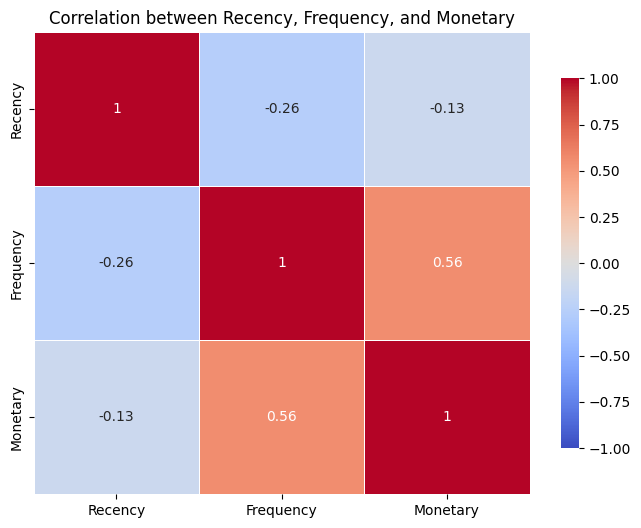

In [ ]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bỏ cột 'CustomerID' nếu có (chỉ giữ các cột số)
rfm_numeric = RFM_score.drop("CustomerID")

# Chuyển các cột thành vector để tính toán ma trận tương quan
assembler = VectorAssembler(inputCols=rfm_numeric.columns, outputCol="features")
rfm_vector = assembler.transform(rfm_numeric).select("features")

# Tính ma trận tương quan
correlation_matrix = Correlation.corr(rfm_vector, "features").head()[0]

# Chuyển ma trận thành Pandas DataFrame để hiển thị
corr_array = np.array(correlation_matrix.toArray())
corr_df = pd.DataFrame(corr_array, index=rfm_numeric.columns, columns=rfm_numeric.columns)

# Hiển thị ma trận tương quan
print("Correlation Matrix:")
print(corr_df)

# Vẽ heatmap để trực quan hóa
plt.figure(figsize=(8,6))
sns.heatmap(corr_df, annot=True, annot_kws={"size": 10}, cmap='coolwarm', center=0,
            cbar_kws={'shrink': 0.8}, linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation between Recency, Frequency, and Monetary')
plt.show()

# **5. Building and Training Machine Learning Model**

### **5.1. Data Transforming**

*Why we have to transform the data before using K-means Clustering?*
- The aims is changing the shape of the data's distribution, making it closer to the desired distribution (e.g., normal distribution)
- This can help improve the performance of statistical and machine learning algorithms, especially when the original data has a skewed distribution or outliers.

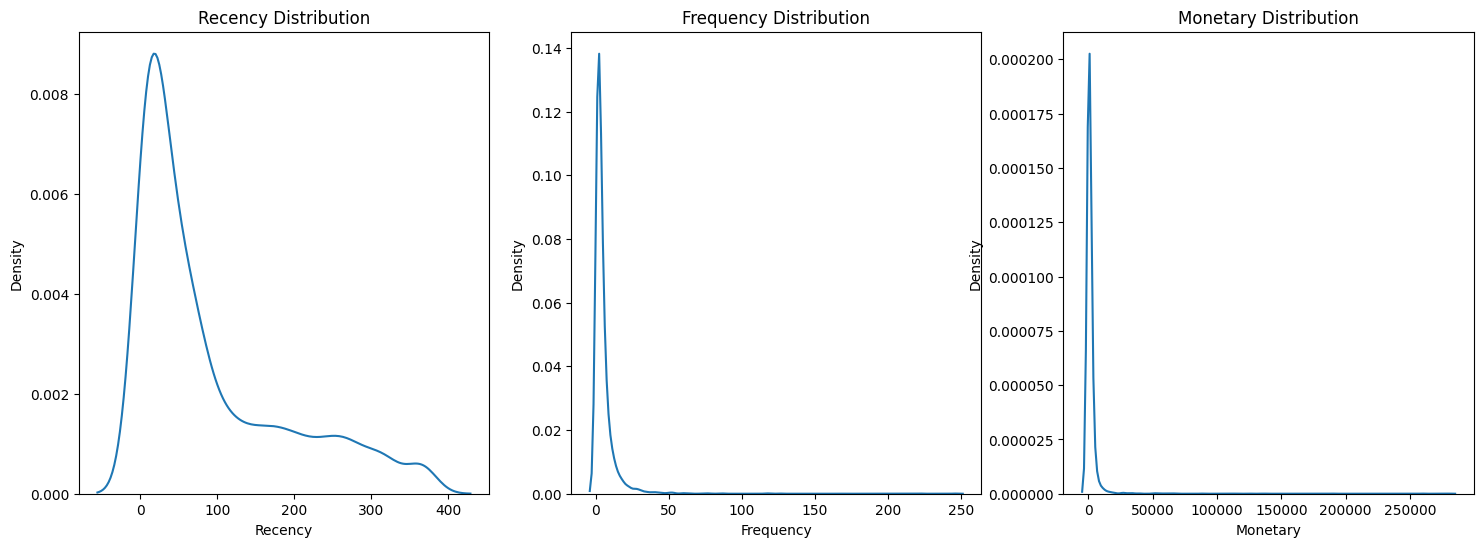

In [ ]:
# Chuyển đổi dữ liệu từ PySpark DataFrame sang Pandas DataFrame
rfm_pandas = RFM_score.select("Recency", "Frequency", "Monetary").toPandas()

# Vẽ biểu đồ KDE với Seaborn
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.kdeplot(rfm_pandas["Recency"], ax=ax[0])
ax[0].set_title("Recency Distribution")

sns.kdeplot(rfm_pandas["Frequency"], ax=ax[1])
ax[1].set_title("Frequency Distribution")

sns.kdeplot(rfm_pandas["Monetary"], ax=ax[2])
ax[2].set_title("Monetary Distribution")

plt.show()


- We can see that the Skewness of 3 variables are also greater than 0 (`Positive Skewness`). Most of the data is concentrated to the left, with the tail extending to the right. We need to transform data in order to make the data distribution closer to a normal distribution (skewness closer to 0)

In [ ]:
from pyspark.sql.functions import log

rfm_transformed = RFM_score.withColumn("Recency", log(col("Recency") + 1)) \
                           .withColumn("Frequency", log(col("Frequency") + 1)) \
                           .withColumn("Monetary", log(col("Monetary") + 1))

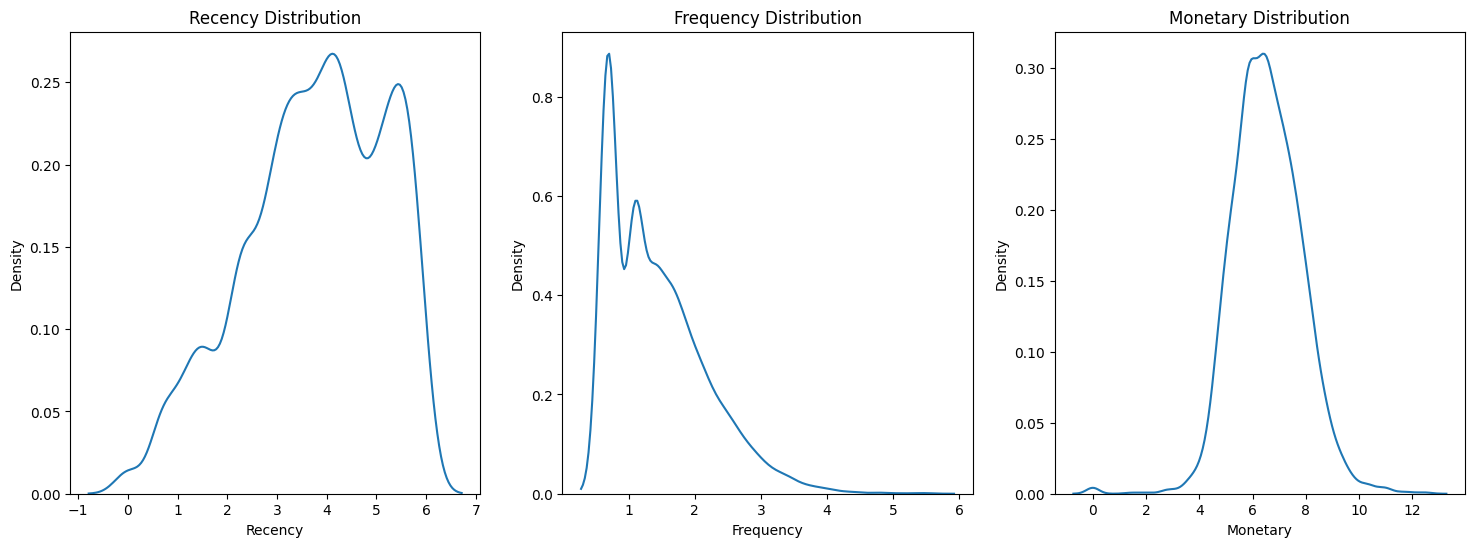

In [ ]:
# Recheck distribution shape of 3 variables: Recency, Frequency, Monetary
rfm_pandas = rfm_transformed.select("Recency", "Frequency", "Monetary").toPandas()

# Vẽ biểu đồ KDE với Seaborn
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.kdeplot(rfm_pandas["Recency"], ax=ax[0])
ax[0].set_title("Recency Distribution")

sns.kdeplot(rfm_pandas["Frequency"], ax=ax[1])
ax[1].set_title("Frequency Distribution")

sns.kdeplot(rfm_pandas["Monetary"], ax=ax[2])
ax[2].set_title("Monetary Distribution")

plt.show()

### **5.2. Data Scaling (Data Normalization)**

*Why we have to transform the data before using K-means Clustering?*
- The aim is bringing attributes to the same scale, helping machine learning algorithms work more effectively.
- This is especially important when attributes have different units of measurement or different ranges of values

In [ ]:
# Initialize VectorAssembler to combine features into a single vector
assembler = VectorAssembler(inputCols=["Recency", "Frequency", "Monetary"], outputCol="features")
rfm_vectorized = assembler.transform(rfm_transformed)

In [ ]:
from pyspark.ml.feature import StandardScaler

# Initialize StandardScaler to standardize the feature vector
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
rfm_scaled = scaler.fit(rfm_vectorized).transform(rfm_vectorized)

### **5.3. Buiding Model - Kmeans**

In [ ]:
from pyspark.ml.clustering import KMeans

# Apply KMeans algorithm with k=4
kmeans = KMeans(featuresCol="scaledFeatures", k=4, seed=42, predictionCol="Cluster")

In [ ]:
from pyspark.ml import Pipeline

# Create a Pipeline with VectorAssembler, StandardScaler, and KMeans
pipeline = Pipeline(stages=[assembler, scaler, kmeans])

In [ ]:
# Train the pipeline on the dataset
model = pipeline.fit(rfm_transformed)
rfm_clustered = model.transform(rfm_transformed)

In [ ]:
rfm_clustered.show()

+----------+------------------+------------------+------------------+--------------------+--------------------+-------+
|CustomerID|           Recency|         Frequency|          Monetary|            features|      scaledFeatures|Cluster|
+----------+------------------+------------------+------------------+--------------------+--------------------+-------+
|     15555|2.5649493574615367| 2.995732273553991| 8.468221410755529|[2.56494935746153...|[1.82356177953848...|      3|
|     15574| 5.181783550292085|1.6094379124341003| 6.517139373724178|[5.18178355029208...|[3.68401130597977...|      1|
|     15634|2.8903717578961645|0.6931471805599453| 5.499419786985366|[2.89037175789616...|[2.05492223502348...|      0|
|     13610|2.5649493574615367| 2.302585092994046| 6.972493780122374|[2.56494935746153...|[1.82356177953848...|      1|
|     13192| 4.564348191467836|1.0986122886681096|  6.81667016102037|[4.56434819146783...|[3.24504298155179...|      1|
|     14157| 2.995732273553991|1.3862943

# **6. Model Evaluation**

WSSSE (Within Set Sum of Squared Errors) helps evaluate the tightness of clusters.

In [ ]:
# Within-Cluster Sum of Squared Errors (WSSSE)

In [ ]:
# Lấy mô hình K-Means từ pipeline đã train
kmeans_model = model.stages[-1]  # Giả sử KMeans là bước cuối trong pipeline

# Lấy WSSSE (Within Set Sum of Squared Errors)
wssse = kmeans_model.summary.trainingCost
print(f"Within-Cluster Sum of Squared Errors (WSSSE): {wssse}")

Within-Cluster Sum of Squared Errors (WSSSE): 4076.220101922837


Silhouette Score helps evaluate the degree of separation between clusters.

In [ ]:
rfm_clustered = rfm_clustered.withColumnRenamed("Cluster", "prediction")

In [ ]:
from pyspark.ml.evaluation import ClusteringEvaluator

evaluator = ClusteringEvaluator(featuresCol="scaledFeatures", metricName="silhouette")
silhouette_score = evaluator.evaluate(rfm_clustered)
print(f"Silhouette Score: {silhouette_score}")

Silhouette Score: 0.4929384789078517


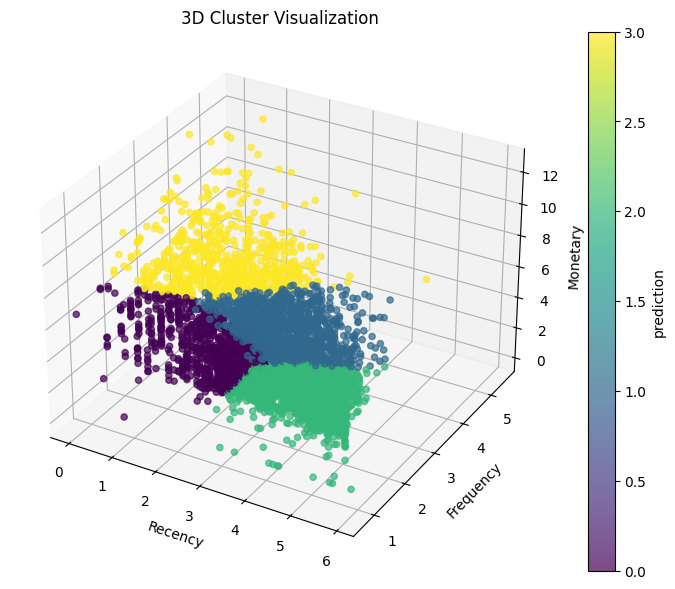

In [ ]:
rfm_pandas = rfm_clustered.select("Recency", "Frequency", "Monetary", "prediction").toPandas()


# Tạo Figure và Axes 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Vẽ scatter plot
scatter = ax.scatter(
    rfm_pandas["Recency"], rfm_pandas["Frequency"], rfm_pandas["Monetary"],
    c=rfm_pandas["prediction"], cmap="viridis", alpha=0.7
)

# Gán nhãn trục
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
ax.set_title("3D Cluster Visualization")

# Thêm colorbar
fig.colorbar(scatter, label="prediction")

# Hiển thị đồ thị
plt.show()



In [ ]:
from pyspark.sql.functions import col

# Join hai DataFrame dựa trên CustomerID
rfm_final = RFM_score.join(rfm_clustered.select("CustomerID", "prediction"), on="CustomerID", how="inner")

# Hiển thị dữ liệu sau khi join
rfm_final.show(5)


+----------+-------+---------+------------------+----------+
|CustomerID|Recency|Frequency|          Monetary|prediction|
+----------+-------+---------+------------------+----------+
|     12346|    325|        2|               0.0|         2|
|     12347|      2|        7| 4310.000000000001|         3|
|     12348|     75|        4|           1797.24|         1|
|     12349|     18|        1|1757.5499999999997|         0|
|     12350|    310|        1|             334.4|         2|
+----------+-------+---------+------------------+----------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import avg

# Calculate the average of Recency, Frequency, and Monetary for each cluster
rfm_averages = rfm_final.groupBy("prediction").agg(
    avg("Recency").alias("Recency"),
    avg("Frequency").alias("Frequency"),
    avg("Monetary").alias("Monetary")
)

# Show the results
rfm_averages.show()


+----------+------------------+------------------+-----------------+
|prediction|           Recency|         Frequency|         Monetary|
+----------+------------------+------------------+-----------------+
|         1| 65.10636442894507|5.0985178727114215|1769.264143853528|
|         3| 9.752562225475842| 16.70278184480234|7834.133149341142|
|         2| 178.1624548736462|  1.48676293622142|348.2031293622148|
|         0|17.388429752066116|2.3518299881936247|548.9053955135774|
+----------+------------------+------------------+-----------------+



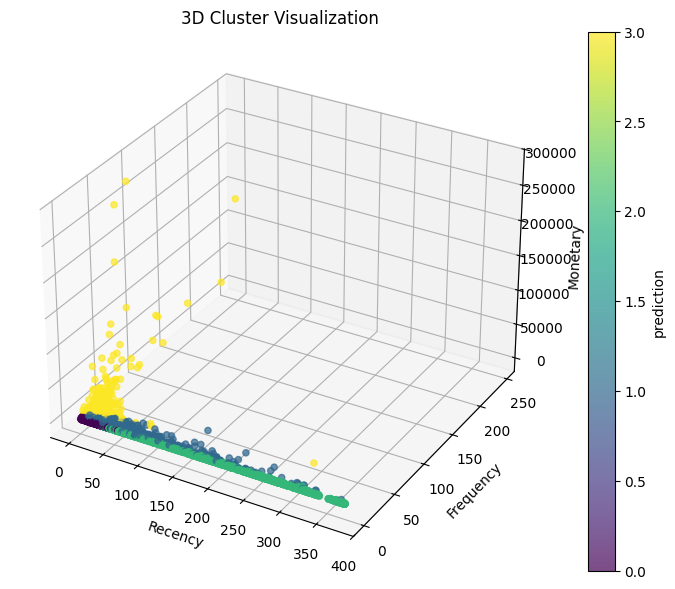

In [ ]:
rfm_pandas_final = rfm_final.select("Recency", "Frequency", "Monetary", "prediction").toPandas()
# Tạo Figure và Axes 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Vẽ scatter plot
scatter = ax.scatter(
    rfm_pandas_final["Recency"], rfm_pandas_final["Frequency"], rfm_pandas_final["Monetary"],
    c=rfm_pandas_final["prediction"], cmap="viridis", alpha=0.7
)

# Gán nhãn trục
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
ax.set_title("3D Cluster Visualization")

# Thêm colorbar
fig.colorbar(scatter, label="prediction")

# Hiển thị đồ thị
plt.show()


# **7. Model Selection**

In [ ]:
rfm_pd = rfm_transformed[['Recency', 'Frequency', 'Monetary']]

In [ ]:
rfm_pd.printSchema()


root
 |-- Recency: double (nullable = true)
 |-- Frequency: double (nullable = true)
 |-- Monetary: double (nullable = true)



In [ ]:
rfm_pd = rfm_pd.toPandas()

In [ ]:
# Import thư viện cần thiết
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, MeanShift, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt


# Chuẩn hóa dữ liệu
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_pd)

# Chuyển dữ liệu đã chuẩn hóa thành DataFrame
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

# Khởi tạo danh sách thuật toán phân cụm
clustering_algorithms = {
    'K-Means': KMeans(n_clusters=4, init="random", random_state=42),
    'K-Means++': KMeans(n_clusters=4, init="k-means++", random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'Hierarchical': AgglomerativeClustering(n_clusters=4, linkage='ward'),
    'Gaussian Mixture': GaussianMixture(n_components=4, random_state=42),
    'Spectral Clustering': SpectralClustering(n_clusters=4, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42),
    'Mean Shift': MeanShift()
}

# Khởi tạo dictionary lưu kết quả
results = {
    'Algorithm': [],
    'Silhouette Score': [],
    'Davies-Bouldin Score': [],
    'Calinski-Harabasz Score': []
}

# Chạy từng thuật toán và đánh giá
for name, algorithm in clustering_algorithms.items():
    print(f"Đang đánh giá: {name}...")
    try:
        if name == 'Gaussian Mixture':
            algorithm.fit(rfm_scaled_df)
            labels = algorithm.predict(rfm_scaled_df)
        elif name == 'Mean Shift':
            algorithm.fit(rfm_scaled_df)
            labels = algorithm.labels_
        else:
            labels = algorithm.fit_predict(rfm_scaled_df)

        # Xử lý ngoại lệ cho DBSCAN (có thể tạo noise)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1 and n_clusters < len(rfm_scaled_df):
            silhouette = silhouette_score(rfm_scaled_df, labels)
            db_score = davies_bouldin_score(rfm_scaled_df, labels)
            ch_score = calinski_harabasz_score(rfm_scaled_df, labels)
        else:
            silhouette = np.nan
            db_score = np.nan
            ch_score = np.nan

        # Lưu kết quả
        results['Algorithm'].append(name)
        results['Silhouette Score'].append(silhouette)
        results['Davies-Bouldin Score'].append(db_score)
        results['Calinski-Harabasz Score'].append(ch_score)

        print(f"{name} - Silhouette Score: {silhouette:.4f}")
    except Exception as e:
        print(f"Lỗi khi chạy {name}: {e}")
        results['Algorithm'].append(name)
        results['Silhouette Score'].append(np.nan)
        results['Davies-Bouldin Score'].append(np.nan)
        results['Calinski-Harabasz Score'].append(np.nan)

# Chuyển kết quả thành DataFrame
evaluation_df = pd.DataFrame(results)

# Hiển thị bảng đánh giá
print("\n🔹 **Kết quả đánh giá các thuật toán phân cụm:**")
display(evaluation_df)


Đang đánh giá: K-Means...
K-Means - Silhouette Score: 0.3327
Đang đánh giá: K-Means++...
K-Means++ - Silhouette Score: 0.3335
Đang đánh giá: DBSCAN...
DBSCAN - Silhouette Score: 0.1915
Đang đánh giá: Hierarchical...
Hierarchical - Silhouette Score: 0.2612
Đang đánh giá: Gaussian Mixture...
Gaussian Mixture - Silhouette Score: 0.1781
Đang đánh giá: Spectral Clustering...
Spectral Clustering - Silhouette Score: 0.1544
Đang đánh giá: Mean Shift...
Mean Shift - Silhouette Score: 0.4859

🔹 **Kết quả đánh giá các thuật toán phân cụm:**


,Algorithm,Silhouette Score,Davies-Bouldin Score,Calinski-Harabasz Score
0,K-Means,0.332703,1.016641,3171.225943
1,K-Means++,0.333494,1.012758,3170.559609
2,DBSCAN,0.191478,2.723208,511.481838
3,Hierarchical,0.261168,1.144410,2648.620565
4,Gaussian Mixture,0.178117,2.993978,1519.141269
5,Spectral Clustering,0.154382,1.629083,1383.850699
6,Mean Shift,0.485901,0.781954,70.424657


**Check with data not transform**

In [ ]:
rfm_pd = RFM_score[['Recency', 'Frequency', 'Monetary']]

In [ ]:
rfm_pd = rfm_pd.select([col(c).cast("double").alias(c) for c in rfm_pd.columns])

In [ ]:
rfm_pd = rfm_pd.toPandas()

In [ ]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_pd)

# Chuyển dữ liệu đã chuẩn hóa thành DataFrame
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

# Khởi tạo danh sách thuật toán phân cụm
clustering_algorithms = {
    'K-Means': KMeans(n_clusters=4, init="random", random_state=42),
    'K-Means++': KMeans(n_clusters=4, init="k-means++", random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'Hierarchical': AgglomerativeClustering(n_clusters=4, linkage='ward'),
    'Gaussian Mixture': GaussianMixture(n_components=4, random_state=42),
    'Spectral Clustering': SpectralClustering(n_clusters=4, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42),
    'Mean Shift': MeanShift()
}

# Khởi tạo dictionary lưu kết quả
results = {
    'Algorithm': [],
    'Silhouette Score': [],
    'Davies-Bouldin Score': [],
    'Calinski-Harabasz Score': []
}

# Chạy từng thuật toán và đánh giá
for name, algorithm in clustering_algorithms.items():
    print(f"Đang đánh giá: {name}...")
    try:
        if name == 'Gaussian Mixture':
            algorithm.fit(rfm_scaled_df)
            labels = algorithm.predict(rfm_scaled_df)
        elif name == 'Mean Shift':
            algorithm.fit(rfm_scaled_df)
            labels = algorithm.labels_
        else:
            labels = algorithm.fit_predict(rfm_scaled_df)

        # Xử lý ngoại lệ cho DBSCAN (có thể tạo noise)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1 and n_clusters < len(rfm_scaled_df):
            silhouette = silhouette_score(rfm_scaled_df, labels)
            db_score = davies_bouldin_score(rfm_scaled_df, labels)
            ch_score = calinski_harabasz_score(rfm_scaled_df, labels)
        else:
            silhouette = np.nan
            db_score = np.nan
            ch_score = np.nan

        # Lưu kết quả
        results['Algorithm'].append(name)
        results['Silhouette Score'].append(silhouette)
        results['Davies-Bouldin Score'].append(db_score)
        results['Calinski-Harabasz Score'].append(ch_score)

        print(f"{name} - Silhouette Score: {silhouette:.4f}")
    except Exception as e:
        print(f"Lỗi khi chạy {name}: {e}")
        results['Algorithm'].append(name)
        results['Silhouette Score'].append(np.nan)
        results['Davies-Bouldin Score'].append(np.nan)
        results['Calinski-Harabasz Score'].append(np.nan)

# Chuyển kết quả thành DataFrame
evaluation_df = pd.DataFrame(results)

# Hiển thị bảng đánh giá
print("\n🔹 **Kết quả đánh giá các thuật toán phân cụm:**")
display(evaluation_df)

Đang đánh giá: K-Means...
K-Means - Silhouette Score: 0.6151
Đang đánh giá: K-Means++...
K-Means++ - Silhouette Score: 0.6117
Đang đánh giá: DBSCAN...
DBSCAN - Silhouette Score: 0.6935
Đang đánh giá: Hierarchical...
Hierarchical - Silhouette Score: 0.5844
Đang đánh giá: Gaussian Mixture...
Gaussian Mixture - Silhouette Score: 0.1493
Đang đánh giá: Spectral Clustering...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



Spectral Clustering - Silhouette Score: -0.1224
Đang đánh giá: Mean Shift...
Mean Shift - Silhouette Score: 0.4308

🔹 **Kết quả đánh giá các thuật toán phân cụm:**


,Algorithm,Silhouette Score,Davies-Bouldin Score,Calinski-Harabasz Score
0,K-Means,0.615134,0.746792,3168.808975
1,K-Means++,0.611708,0.676704,3181.611567
2,DBSCAN,0.693543,1.557519,490.359304
3,Hierarchical,0.584411,0.624984,2832.882085
4,Gaussian Mixture,0.149321,1.567460,845.866648
5,Spectral Clustering,-0.122357,0.925166,542.756189
6,Mean Shift,0.430776,0.263327,293.823379


In [ ]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_pd)

# Chuyển dữ liệu đã chuẩn hóa thành DataFrame
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

# Khởi tạo danh sách thuật toán phân cụm
clustering_algorithms = {
    'K-Means': KMeans(n_clusters=3, init="random", random_state=42),
    'K-Means++': KMeans(n_clusters=3, init="k-means++", random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'Hierarchical': AgglomerativeClustering(n_clusters=3, linkage='ward'),
    'Gaussian Mixture': GaussianMixture(n_components=3, random_state=42),
    'Spectral Clustering': SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42),
    'Mean Shift': MeanShift()
}

# Khởi tạo dictionary lưu kết quả
results = {
    'Algorithm': [],
    'Silhouette Score': [],
    'Davies-Bouldin Score': [],
    'Calinski-Harabasz Score': []
}

# Chạy từng thuật toán và đánh giá
for name, algorithm in clustering_algorithms.items():
    print(f"Đang đánh giá: {name}...")
    try:
        if name == 'Gaussian Mixture':
            algorithm.fit(rfm_scaled_df)
            labels = algorithm.predict(rfm_scaled_df)
        elif name == 'Mean Shift':
            algorithm.fit(rfm_scaled_df)
            labels = algorithm.labels_
        else:
            labels = algorithm.fit_predict(rfm_scaled_df)

        # Xử lý ngoại lệ cho DBSCAN (có thể tạo noise)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1 and n_clusters < len(rfm_scaled_df):
            silhouette = silhouette_score(rfm_scaled_df, labels)
            db_score = davies_bouldin_score(rfm_scaled_df, labels)
            ch_score = calinski_harabasz_score(rfm_scaled_df, labels)
        else:
            silhouette = np.nan
            db_score = np.nan
            ch_score = np.nan

        # Lưu kết quả
        results['Algorithm'].append(name)
        results['Silhouette Score'].append(silhouette)
        results['Davies-Bouldin Score'].append(db_score)
        results['Calinski-Harabasz Score'].append(ch_score)

        print(f"{name} - Silhouette Score: {silhouette:.4f}")
    except Exception as e:
        print(f"Lỗi khi chạy {name}: {e}")
        results['Algorithm'].append(name)
        results['Silhouette Score'].append(np.nan)
        results['Davies-Bouldin Score'].append(np.nan)
        results['Calinski-Harabasz Score'].append(np.nan)

# Chuyển kết quả thành DataFrame
evaluation_df = pd.DataFrame(results)

# Hiển thị bảng đánh giá
print("\n🔹 **Kết quả đánh giá các thuật toán phân cụm:**")
display(evaluation_df)

Đang đánh giá: K-Means...
K-Means - Silhouette Score: 0.5833
Đang đánh giá: K-Means++...
K-Means++ - Silhouette Score: 0.5833
Đang đánh giá: DBSCAN...
DBSCAN - Silhouette Score: 0.6935
Đang đánh giá: Hierarchical...
Hierarchical - Silhouette Score: 0.5836
Đang đánh giá: Gaussian Mixture...
Gaussian Mixture - Silhouette Score: 0.1439
Đang đánh giá: Spectral Clustering...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



Spectral Clustering - Silhouette Score: 0.4860
Đang đánh giá: Mean Shift...
Mean Shift - Silhouette Score: 0.4308

🔹 **Kết quả đánh giá các thuật toán phân cụm:**


,Algorithm,Silhouette Score,Davies-Bouldin Score,Calinski-Harabasz Score
0,K-Means,0.583322,0.678065,2944.878430
1,K-Means++,0.583322,0.678065,2944.878430
2,DBSCAN,0.693543,1.557519,490.359304
3,Hierarchical,0.583578,0.739824,2820.990160
4,Gaussian Mixture,0.143886,1.357478,854.367590
5,Spectral Clustering,0.485974,0.548253,881.551004
6,Mean Shift,0.430776,0.263327,293.823379


<ipython-input-107-5e987deba078>:15: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-107-5e987deba078>:23: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-107-5e987deba078>:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



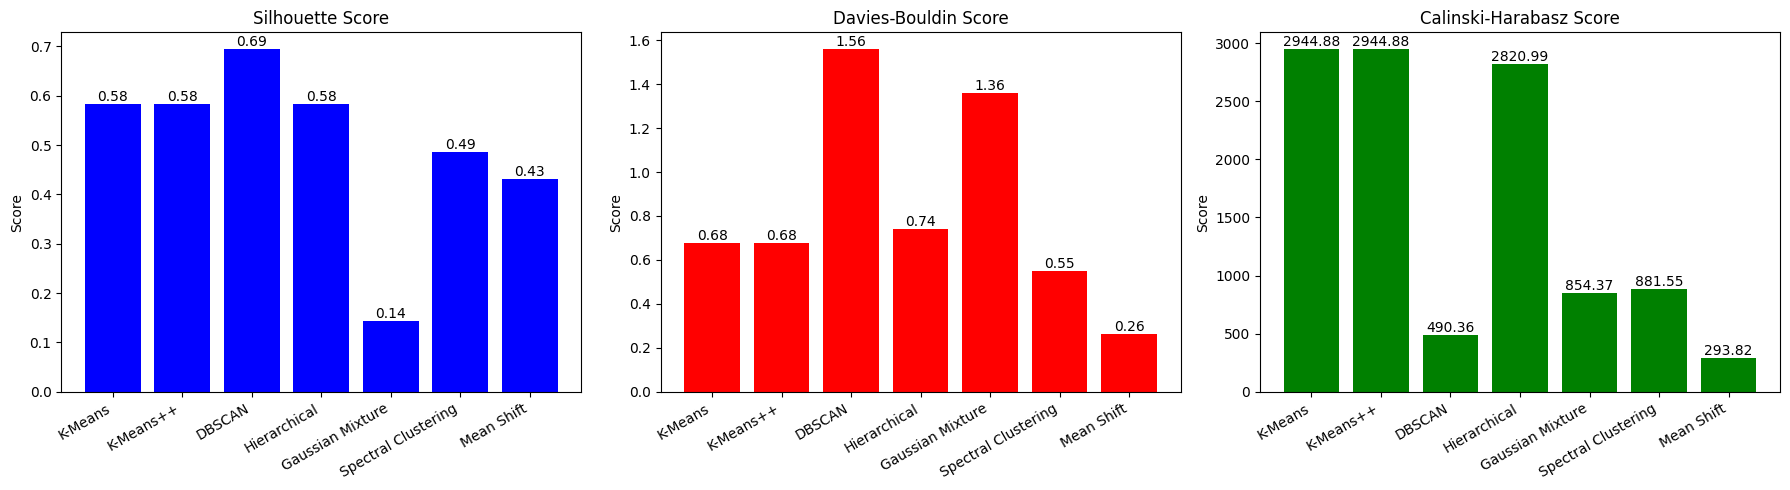

In [ ]:
labels = evaluation_df['Algorithm']
silhouette_scores = evaluation_df['Silhouette Score']
db_scores = evaluation_df['Davies-Bouldin Score']
ch_scores = evaluation_df['Calinski-Harabasz Score']

x = np.arange(len(labels))

# Tạo figure và 3 axes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Vẽ biểu đồ cho Silhouette Score
axes[0].bar(labels, silhouette_scores, color='b')
axes[0].set_title("Silhouette Score")
axes[0].set_ylabel("Score")
axes[0].set_xticklabels(labels, rotation=30, ha="right")
for i in range(len(labels)):
    axes[0].text(i, silhouette_scores.iloc[i], f"{silhouette_scores.iloc[i]:.2f}", ha='center', va='bottom', fontsize=10)

# Vẽ biểu đồ cho Davies-Bouldin Score
axes[1].bar(labels, db_scores, color='r')
axes[1].set_title("Davies-Bouldin Score")
axes[1].set_ylabel("Score")
axes[1].set_xticklabels(labels, rotation=30, ha="right")
for i in range(len(labels)):
    axes[1].text(i, db_scores.iloc[i], f"{db_scores.iloc[i]:.2f}", ha='center', va='bottom', fontsize=10)

# Vẽ biểu đồ cho Calinski-Harabasz Score
axes[2].bar(labels, ch_scores, color='g')
axes[2].set_title("Calinski-Harabasz Score")
axes[2].set_ylabel("Score")
axes[2].set_xticklabels(labels, rotation=30, ha="right")
for i in range(len(labels)):
    axes[2].text(i, ch_scores.iloc[i], f"{ch_scores.iloc[i]:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
# Train the pipeline on the dataset
model1 = pipeline.fit(RFM_score)
rfm_clustered1 = model.transform(RFM_score)

In [ ]:
rfm_clustered1.show(3)

+----------+-------+---------+------------------+--------------------+--------------------+-------+
|CustomerID|Recency|Frequency|          Monetary|            features|      scaledFeatures|Cluster|
+----------+-------+---------+------------------+--------------------+--------------------+-------+
|     15555|     12|       19| 4760.039999999998|[12.0,19.0,4760.0...|[8.53145162137570...|      3|
|     15574|    177|        4| 675.6399999999998|[177.0,4.0,675.63...|[125.838911415291...|      3|
|     15634|     17|        1|243.54999999999998|[17.0,1.0,243.549...|[12.0862231302822...|      3|
+----------+-------+---------+------------------+--------------------+--------------------+-------+
only showing top 3 rows



In [ ]:
rfm_final_1 = RFM_score.join(rfm_clustered1.select("CustomerID", "Cluster"), on="CustomerID", how="inner")

In [ ]:
# Calculate the average of Recency, Frequency, and Monetary for each cluster
rfm_averages1 = rfm_final_1.groupBy("Cluster").agg(
    avg("Recency").alias("Recency"),
    avg("Frequency").alias("Frequency"),
    avg("Monetary").alias("Monetary")
)

# Show the results
rfm_averages1.show()

+-------+------------------+------------------+------------------+
|Cluster|           Recency|         Frequency|          Monetary|
+-------+------------------+------------------+------------------+
|      1| 230.6326129666012|1.4282907662082516| 235.0298035363459|
|      3| 58.40117089489824| 5.769724003345414|2308.3601240591042|
|      2|270.92946058091286|1.2074688796680497| 99.47946058091286|
|      0|               0.5|               2.5|1.4499999999999929|
+-------+------------------+------------------+------------------+



# **8.  Deploying the Model with Gradio**

In [ ]:
kmeans.write().overwrite().save("kmeans_model")

In [ ]:
import pickle
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
model.write().overwrite().save("rfm_kmeans_pipeline")

In [ ]:
import gradio as gr
import numpy as np
import pandas as pd
import pickle
import pyspark
from pyspark.ml import PipelineModel
from pyspark.ml.clustering import KMeansModel
from pyspark.ml.feature import VectorAssembler
import pyspark.sql.functions as F

# Load K-Means model and scaler
kmeans_model = PipelineModel.load("rfm_kmeans_pipeline")
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Define function to transform data
def preprocess_data(recency, frequency, monetary):
    """
    Apply log transformation and scaling to RFM data.
    """
    # Convert to DataFrame
    input_data = pd.DataFrame([[recency, frequency, monetary]], columns=['Recency', 'Frequency', 'Monetary'])

    # Apply log transformation (avoid log(0) error by adding 1)
    input_data = input_data.applymap(lambda x: np.log1p(x))

    # Scale data
    input_scaled = scaler.transform(input_data)

    return input_scaled

# Define function for customer segmentation
def predict_segment(recency, frequency, monetary):
    """
    Predict customer segment using K-Means.
    """
    input_scaled = preprocess_data(recency, frequency, monetary)

    # Predict cluster
    cluster_label = kmeans.predict(input_scaled)[0]

    # Define cluster descriptions
    segment_mapping = {
        0: "🆕 **Cluster 0: Khách hàng mới** - Mới thử mua, tiềm năng, cần chiến lược giữ chân.",
        1: "💎 **Cluster 1: Khách hàng tiềm năng** - Mua đều đặn, chi tiêu cao, cần chăm sóc để giữ chân.",
        2: "❌ **Cluster 2: Khách hàng rời bỏ** - Ít giao dịch, đã lâu không mua, cần chiến lược tiếp thị lại.",
        3: "👑 **Cluster 3: Khách hàng VIP** - Trung thành, mua thường xuyên, chi tiêu cao, rất quan trọng."
    }

    segment_description = segment_mapping.get(cluster_label, "Không xác định phân khúc.")

    return segment_description

# Create Gradio interface
iface = gr.Interface(
    fn=predict_segment,
    inputs=[
        gr.Number(label="📆 Recency (số ngày)", minimum=0),
        gr.Number(label="🔁 Frequency (số lần mua hàng)", minimum=0),
        gr.Number(label="💰 Monetary (tổng chi tiêu - USD)", minimum=0)
    ],
    outputs=gr.Textbox(label="🔹 Phân khúc khách hàng"),
    title="🔍 Phân khúc khách hàng bằng K-Means",
    description="Nhập điểm RFM để dự đoán phân khúc khách hàng dựa trên mô hình K-Means."
)

# Launch Gradio app
iface.launch()
